# Оценка результатов A/B-тестирования

**Техническое задание:**
- Название теста: `recommender_system_test`;
- группы: А — контрольная, B — новая платёжная воронка;
- дата запуска: 2020-12-07;
- дата остановки набора новых пользователей: 2020-12-21;
- дата остановки: 2021-01-04;
- аудитория: 15% новых пользователей из региона EU;
- назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- ожидаемое количество участников теста: 6000.
- ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров — событие `product_page`,
    - просмотры корзины — `product_cart`,
    - покупки — `purchase`.


***Цель:***  *Провести оценку результатов A/B-теста.*

**Задачи:**
- Оценить корректность проведения теста. Проверить:
    - Соответствие данных требованиям технического задания. В случае нарушения требований оцените, насколько существенно негативное влияние на результаты теста. При проверке условий технического задания и фильтрации данных, проконтролировать количество уникальных пользователей, принимающих участие в тесте – это поможет детальнее изучить влияние каждого условия на аудиторию теста.
    - Время проведения теста. Убедиться, что оно не совпадает с маркетинговыми и другими активностями.
    - Аудиторию теста. Удостовериться, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно. Проверить равномерность распределения пользователей по группам и правильность их формирования.
- Проанализировать результаты теста

# Описание данных

`ab_project_marketing_events.csv` — календарь маркетинговых событий на 2020 год.

`final_ab_new_users.csv` — пользователи, зарегистрировавшиеся с 7 по 21 декабря 2020 года.

`final_ab_events.csv` — действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года.

`final_ab_participants.csv` — таблица участников тестов.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными</a></span><ul class="toc-item"><li><span><a href="#Таблица-marketing_events" data-toc-modified-id="Таблица-marketing_events-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Таблица marketing_events</a></span></li><li><span><a href="#Таблица-new_users" data-toc-modified-id="Таблица-new_users-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Таблица new_users</a></span></li><li><span><a href="#Таблица-events" data-toc-modified-id="Таблица-events-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Таблица events</a></span></li><li><span><a href="#Таблица-participants" data-toc-modified-id="Таблица-participants-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Таблица participants</a></span></li></ul></li><li><span><a href="#Корректность-проведения-теста" data-toc-modified-id="Корректность-проведения-теста-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Корректность проведения теста</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Количество-событий-на-пользователя" data-toc-modified-id="Количество-событий-на-пользователя-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Количество событий на пользователя</a></span></li><li><span><a href="#Распределение-числа-событий-по-дням" data-toc-modified-id="Распределение-числа-событий-по-дням-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Распределение числа событий по дням</a></span></li><li><span><a href="#Конверсия-воронки-в-выборках-на-разных-этапах" data-toc-modified-id="Конверсия-воронки-в-выборках-на-разных-этапах-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Конверсия воронки в выборках на разных этапах</a></span></li></ul></li><li><span><a href="#Результаты-A/B-тестирования" data-toc-modified-id="Результаты-A/B-тестирования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Результаты A/B-тестирования</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Знакомство с данными

In [1]:
# импортируем библиотеки
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mth
import warnings # импортируем warnings, чтобы исключить предупреждения 
warnings.simplefilter("ignore")
%config InlineBackend.figure_format = 'retina'#добавляем графикам четкости

In [2]:
# читаем файлы с данными
marketing_events = pd.read_csv('ab_project_marketing_events.csv')
new_users = pd.read_csv('final_ab_new_users.csv')
events = pd.read_csv('final_ab_events.csv')
participants = pd.read_csv('final_ab_participants.csv')

In [3]:
# задаем функцию для вывода общей информации по данным
def data_info(data):
    display(data.head())
    print()
    print('Информация о таблице:')
    print()
    print(data.info())
    print()

    if data.isna().sum().sum() == 0:
        print('Пропусков в данных нет')
    else:
        print('Количество пропусков по столбцам:')
        print(data.isna().sum())
    print('Количество дубликатов:', data.duplicated().sum())
    print()
    for i in data:
        print('Количество yникальныx значений столбца', i,':', data[i].nunique() )
        print('Уникальные значения столбца', i,':')
        print(data[i].sort_values().unique())
        print()

### Таблица marketing_events

In [4]:
data_info(marketing_events)

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11



Информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
None

Пропусков в данных нет
Количество дубликатов: 0

Количество yникальныx значений столбца name : 14
Уникальные значения столбца name :
['4th of July Promo' 'Black Friday Ads Campaign'
 'CIS New Year Gift Lottery' 'Chinese Moon Festival'
 'Chinese New Year Promo' 'Christmas&New Year Promo'
 'Dragon Boat Festival Giveaway' 'Easter Promo'
 "International Women's Day Promo" 'Labor day (May 1st) Ads Campaign'
 "Single's Day Gift Promo" "St. Patric's Day Promo"
 "St. Valentine's Day Giveaway" 'Victory Day CIS (May 9th) Event']

Количество yникальныx значений столбца regions : 6
Уникальные з

Таблица `marketing_events` содержит 4 столбца:
 - 14 названий маркетинговых событий;
 - регионы, в которых будет проводиться рекламная кампания (Северная Америка, Европа, Азиатско-тихоокеанский регион и СНГ);
 - даты начала кампаний;
 - даты завершения кампаний.
 
Пропусков и дубоикатов в данных нет.

### Таблица new_users

In [5]:
data_info(new_users)

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone



Информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB
None

Пропусков в данных нет
Количество дубликатов: 0

Количество yникальныx значений столбца user_id : 61733
Уникальные значения столбца user_id :
['0001710F4DDB1D1B' '000199F1887AE5E6' '0002499E372175C7' ...
 'FFF91B6C5431F375' 'FFFAB034A09DCC28' 'FFFFE36C0F6E92DF']

Количество yникальныx значений столбца first_date : 17
Уникальные значения столбца first_date :
['2020-12-07' '2020-12-08' '2020-12-09' '2020-12-10' '2020-12-11'
 '2020-12-12' '2020-12-13' '2020-12-14' '2020-12-15' '2020-12-16'
 '2020-12-17' '2020-12-18' '2020-12-19' '2020-12-20' '2020-12-21'
 '2020-12-22' '2020-12-2

Таблица `new_users` содержит 4 столбца:
 - 61733 уникальных пользователя;
 - 17 кникальных дат регистрации;
 - 4 региона пользователей ('EU', 'N.America', 'APAC', 'CIS');
 - 4 вида устройств, с которого происходила регистрация('PC','Android', 'iPhone' и 'Mac')
 
 Новые пользователи регистрировались с 7 по 23 декабря.\
 Пропусков и дубликатов в данных нет

### Таблица events

In [6]:
data_info(events)

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99



Информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB
None

Количество пропусков по столбцам:
user_id            0
event_dt           0
event_name         0
details       377577
dtype: int64
Количество дубликатов: 0

Количество yникальныx значений столбца user_id : 58703
Уникальные значения столбца user_id :
['0001710F4DDB1D1B' '000199F1887AE5E6' '0002499E372175C7' ...
 'FFF91B6C5431F375' 'FFFAB034A09DCC28' 'FFFFE36C0F6E92DF']

Количество yникальныx значений столбца event_dt : 267268
Уникальные значения столбца event_dt :
['2020-12-07 00:00:33' '2020-12-07 00:00:34' '2020-12-07 00:00:35' ...
 '2020-12-30 23:

Таблица `events` хранит 4 столбца:
 - 58703 уникальных идентификатора пользователей;
 -  дату и время события;
 - 4 события ('purchase'-покупка, 'product_cart'-корзина, 'product_page'-страница товара, 'login'-страница входа);
 - 4 вида дополнительныx данные о событии. Судя по всему только для  purchase здесь хранится стоимость покупки в долларах.
 
Собития проходили с 7 по 30 декабря 2020 года

Посмотрим, есть ли какие-либо доаолнительные данные для других событий

In [7]:
# сформируем таблицу с количеством уникальных значений details, их количеством и количеством записей в event_name
display(events.groupby('event_name').agg({'details':['nunique', 'count'], 'event_name':'count'}))

details        event_name
             nunique  count      count
event_name                            
login              0      0     189552
product_cart       0      0      62462
product_page       0      0     125563
purchase           4  62740      62740

Нет, только для покупок указана их стоимость, причем все строки заполнены.
Дубликатов в данных нет.

### Таблица participants

In [8]:
data_info(participants)

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test



Информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB
None

Пропусков в данных нет
Количество дубликатов: 0

Количество yникальныx значений столбца user_id : 16666
Уникальные значения столбца user_id :
['0002CE61FF2C4011' '000ABE35EE11412F' '001064FEAAB631A1' ...
 'FFEFC0E55C1CCD4F' 'FFF28D02B1EACBE1' 'FFF58BC33966EB51']

Количество yникальныx значений столбца group : 2
Уникальные значения столбца group :
['A' 'B']

Количество yникальныx значений столбца ab_test : 2
Уникальные значения столбца ab_test :
['interface_eu_test' 'recommender_system_test']



Таблица `participants` содержит 3 столбца:
 - 16666 уникальных идентификатора пользователей;
 - 2 группы пользователей A и B
 - 2 названия теста;
 
 Пропусков и дубликатов в двнных нет.

## Корректность проведения теста

В данных присутствуют даты различных видов событий, их необходимо привести к удобному формату.
Пропуски есть только в таблице `events` в столбце с деталями, где только для покупок обозначена их стоимость.

In [9]:
# преобразуем дату во всех таблицах
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'], format='%Y-%m-%d')
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'], format='%Y-%m-%d')
new_users['first_date'] = pd.to_datetime(new_users['first_date'], format='%Y-%m-%d')
events['event_dt'] = pd.to_datetime(events['event_dt'], format='%Y-%m-%dT%H:%M:%S')

- **Название теста:** `recommender_system_test`

In [10]:
print('Название теста:', participants['ab_test'].unique())
print('Процент пользователей теста recommender_system_test',
      round(participants[participants['ab_test']=='recommender_system_test']['ab_test'].count()/
     participants['ab_test'].count()*100,2))

Название теста: ['recommender_system_test' 'interface_eu_test']
Процент пользователей теста recommender_system_test 36.68


Посмотрим есть ли пользователи, которые попали сразу в оба теста

In [11]:
# проверяем наличие пользователей попавших сразу в оба теста 
print('Доля пользователей, попавшая в оба теста:',
      '{0:.1%}'.format(participants
                       .groupby('user_id')
                       .agg({'ab_test' : 'nunique'})
                       .query('ab_test > 1')['ab_test'].count()
                       /participants['user_id'].nunique()))

# проверяем наличие пользователей попавших сразу в обе группы 
print('Доля пользователей, попавшая в обе группы:',
      '{0:.1%}'.format(participants
                       .groupby('user_id')
                       .agg({'group' : 'nunique'})
                       .query('group > 1')['group'].count()
                       /participants['user_id'].nunique()))

# проверяем наличие пользователей попавших сразу в обе группы в разных тестах
for i in participants['ab_test'].unique().tolist():
    print('Доля пользователей, попавшая в обе группы теста',i, ':',
          '{0:.1%}'.format(participants[participants['ab_test'] == i]
                           .groupby('user_id')
                           .agg({'group' : 'nunique'})
                           .query('group > 1')['group'].count()
                           /participants['user_id'].nunique()))

Доля пользователей, попавшая в оба теста: 9.6%
Доля пользователей, попавшая в обе группы: 4.7%
Доля пользователей, попавшая в обе группы теста recommender_system_test : 0.0%
Доля пользователей, попавшая в обе группы теста interface_eu_test : 0.0%


9,6 % пользователей участвовали сразу в двух экспериментах. По отдельности пользователи не попали в разные экспериментальные группы, однако если смотреть в целом, то таких пользователей 4,7%. Мы не знаем назначение этого теста и распределение контрольных групп внутри него. 
Будем считать, что на дальнейшие исследования этот факт не повлияет.

In [12]:
# оставляем пользователей, которые участвовали в интересующем нас тесте.
participants_rst = participants.loc[participants['ab_test']=='recommender_system_test']

In [13]:
print('Количество пользователей в таблице participants_rst:', participants_rst.shape[0])

Количество пользователей в таблице participants_rst: 6701


- **группы: А — контрольная, B — новая платёжная воронка;**


В тесте действительно только две группы, мы убедились в этом на шаге знакомства с данными

- **дата запуска: 2020-12-07;**
- **дата остановки: 2021-01-04;**

In [14]:
print('Минимальная дата:', events['event_dt'].min())
print('Максимальная дата:', events['event_dt'].max())

Минимальная дата: 2020-12-07 00:00:33
Максимальная дата: 2020-12-30 23:36:33


Минимальная дата совпадает с датой запуска, однако дата остановки сильно завышена. Данные с 31 декабря 2020 по 4 января 2021 отсутсвуют. Данный факт может пагубно сказаться на результатах исследования, т.к. данные присутсвуют не за весь период.

- **дата остановки набора новых пользователей: 2020-12-21;**

В таблице participants остались только интересующие нас пользователи. Начнем создавать финальную таблицу путем присоединения таблицы new_users к participants

In [15]:
df = participants_rst.merge(new_users, on= 'user_id', how='inner')

Проверим, что новых пользователей перестали набирать 21 декабря. 

In [16]:
print(df['first_date'].min())
print(df['first_date'].max())

2020-12-07 00:00:00
2020-12-21 00:00:00


Действительно новых пользователей перестали набирать 21 декабря, что соответствует ТЗ.

- **аудитория: в тест должно быть отобрано 15% новых пользователей из региона EU;**

In [17]:
# Отделим пользователей таблицы new_users зарегистрировавшихся после 21 декабря
new_users_rst = new_users.loc[new_users['first_date']<='2020-12-21']

In [18]:
print('Доля пользователей из Европы, попавшая в тест:',
      '{0:.1%}'.format( df[df['region']=='EU']['user_id'].nunique()
                       /new_users_rst[new_users_rst['region']=='EU']['region'].count()))

Доля пользователей из Европы, попавшая в тест: 15.0%


Процент пользователей из Европы попавших в тест равен 15%, так что будем считать, что пункт ТЗ выполнен.

- **ожидаемое количество участников теста: 6000.**

In [19]:
print('Количество участников теста:', df.shape[0])

Количество участников теста: 6701


Количество участников теста больше ожидаемого.

 - **В техническом задании сказано, что время за которое пользователи дожны улучшить свои метрики 14 дней.**
 
 Для каждого пользователя следует удалить события после 14 дней регистрации.
 
 Для начала добавим события к итоговой таблице.

In [20]:
df = df.merge(events, on= 'user_id', how='left')
print('Количество уникальных событий:', df.shape[0])

Количество уникальных событий: 27724


Посмотрим как распределились пользователи по группам

In [21]:
# сгруппируем таблицу по группам и выведем уникальное количество пользователей
display(df.groupby('group').agg({'user_id':'nunique'}))

,user_id
group,
A,3824
B,2877


Большее количество пользователей в контрольной группе, чем в новой платёжной воронке.

In [22]:
# выведем на экран информацию о получившейся таблице
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27724 entries, 0 to 27723
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     27724 non-null  object        
 1   group       27724 non-null  object        
 2   ab_test     27724 non-null  object        
 3   first_date  27724 non-null  datetime64[ns]
 4   region      27724 non-null  object        
 5   device      27724 non-null  object        
 6   event_dt    24698 non-null  datetime64[ns]
 7   event_name  24698 non-null  object        
 8   details     3331 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 2.1+ MB


None

В таблице обнаружились пользователи для которых нет событий.
Посмотрим, что это за пользователи с нулевыми событиями и к каким группам теста они пренадлежат.

In [23]:
# оставляем в таблице только нулевые события, группируем по группам и узнаем уникальное количество пользователей
display(df[df['event_dt'].isnull()].groupby('group').agg({'user_id':'nunique'}))

,user_id
group,
A,1077
B,1949


Пользователи без событий относятся к обеим группам. Большая часть таких пользователей из новой платёжной воронки, которая итак обладает дефицитом пользователей по сравнению с контрольной группой. Однако, в дальнейших исследованиях такие пользователи не будут участвовать при подсчете ступеней воронки событий, поэтому оставим в данных только пользователей, у которых есть события.

In [24]:
# удаляет нулевые события
df = df.dropna(subset=['event_dt'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24698 entries, 0 to 27723
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     24698 non-null  object        
 1   group       24698 non-null  object        
 2   ab_test     24698 non-null  object        
 3   first_date  24698 non-null  datetime64[ns]
 4   region      24698 non-null  object        
 5   device      24698 non-null  object        
 6   event_dt    24698 non-null  datetime64[ns]
 7   event_name  24698 non-null  object        
 8   details     3331 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 1.9+ MB


Теперь в данных остались пропуски только в столбце details

In [26]:
# почситаем сколько времени прошло с момента регистрации до последнего события
df['time_delta'] = (df['event_dt'] - df['first_date']).dt.days
df.query('time_delta >14')

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details,time_delta
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:56,purchase,4.99,18
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:57,product_cart,NaN,18
5,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:57,product_page,NaN,18
7,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:56,login,NaN,18
56,92CB588012C10D3D,A,recommender_system_test,2020-12-09,EU,PC,2020-12-25 18:11:49,product_page,NaN,16
...,...,...,...,...,...,...,...,...,...,...
27689,053FB26D6D49EDDC,A,recommender_system_test,2020-12-10,N.America,Android,2020-12-25 00:27:11,purchase,4.99,15
27692,053FB26D6D49EDDC,A,recommender_system_test,2020-12-10,N.America,Android,2020-12-25 00:27:11,product_page,NaN,15
27695,053FB26D6D49EDDC,A,recommender_system_test,2020-12-10,N.America,Android,2020-12-25 00:27:11,login,NaN,15
27705,29C92313A98B1176,B,recommender_system_test,2020-12-07,APAC,Android,2020-12-28 01:26:08,product_page,NaN,21


Существует 628 событий выходящих за рамки допустимого времени. Оставим в таблице только события до 14 дня после регистрации вклчительно.

In [27]:
# удаляем лишние события и столбец timedelta
df = df.query('time_delta < 15').drop('time_delta', axis=1)
print('Количество уникальных событий после удаления событий после порогового лимита времени:', df.shape[0])

Количество уникальных событий после удаления событий после порогового лимита времени: 24070


 - **Влияние маркетинговых событий**

Имеются данные о проведении теста в период с 7 декабря по  4 января, проверим, если ли маркетинговые акции, проводившиеся в это время.

In [28]:
marketing_events.query('start_dt < "2021-01-04" and finish_dt > "2020-12-07"')

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07


Таких компаний две.\
CIS New Year Gift Lottery - затрагивает только один день нашего исследования - 30 декабря, тогда как Christmas&New Year Promo, проводившееся в Европе и Северной Америке затрагивает период с 25 по 30 декабря. Это довольно большой промежуток времени, однако данные итак не полные. Будем считать, что события данных рекламных компаний повлияли на пользователей обеих групп одинаково.

- **Распределение пользователей по группам**

Посмотрим как распределелились пользователели между двумя группами тестов

In [29]:
# постротрим как распределились группы участников
df.groupby('group').agg({'user_id':'nunique'})

,user_id
group,
A,2747
B,928


после всез преобразований распределение на группы выглядит крайне неравномерно. К группе А относится в три раза больше пользователей, чем к B.

In [30]:
print('Количество участников теста, совершивших события', df['user_id'].nunique())

Количество участников теста, совершивших события 3675


От изначальных участников события осталось чуть больше половины и меньше ожидаемого количества участников в 6000.

**Промежуточные выводы**

 - В таблице о тестах присутствуют данные за два A/B-теста. Пользователи этих тестов пересекаются между собой, пересечений по группам внутри тестаов не обнаружено.
 - В датах проведения теста наблюдается недостача данных. В файле событий временной промежуток находится в пределах 7-30 декабря 2020 года, когда заявленные дата проведения теста 7 декабря 2020- 4 января 2021.
 - В таблице с новыми пользователями пришлось отсечь пользователей, зарегистрировавшихся после 21 декабря 2020 года
 - Ровно 15% от общего количества новых зарегестрированных пользователей попало в эксперимент.
 - На старте уникальных устастников теста оказалось 6701, однако после исключения из данных пользователей, для которых не определены события, всего участников эксперимента 3675. Можно предположить, что данные пользователи не совершили никаких действий.
 - Из итоговой таблицы были отсечены события, которые осуществил пользователь после 14 дня с момента регистрации.
 - Разбиение на группы пользователей крайне неравномерное.
 
В целом полученные данные соответствуют ТЗ на половину: есть много пропущенных значений, данные представлены нев полном об'ёме- отсутсвуют результаты эксперимента за 5 дней. Во время проведения эксперимента проводились маркетинговые акции, что так же могло повлиять на результаты тестирования. В конечном счете от заявленного количества участников эксперимента осталось чуть больше половины.

Проверить хватает ли пользователей

## Исследовательский анализ

### Количество событий на пользователя

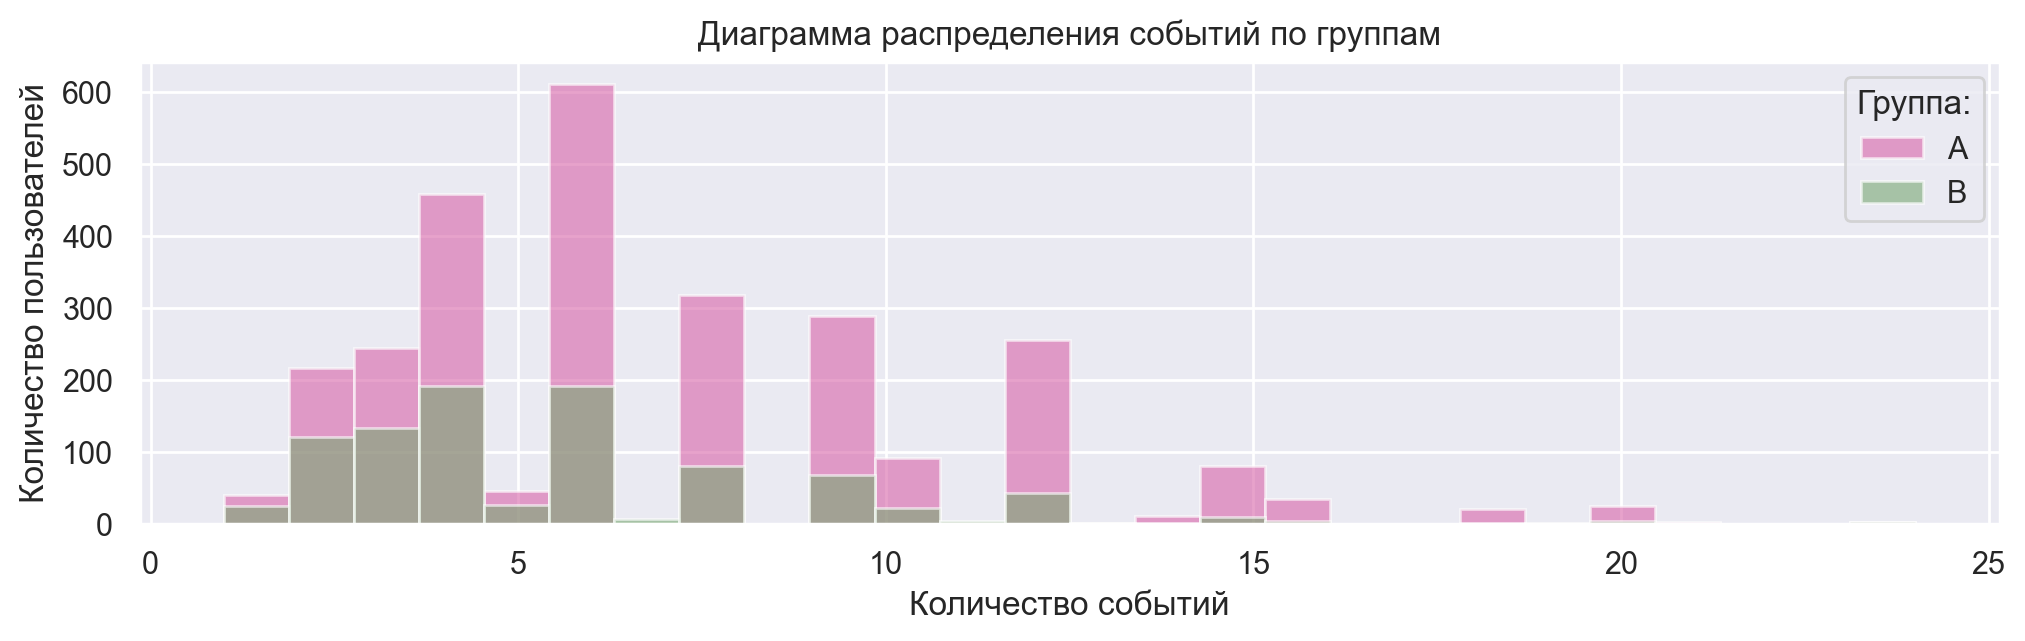

In [31]:
# создадим таблицу распределения событий по группам
event_count = df.pivot_table(index='user_id', columns = 'group', values = 'event_name', aggfunc = 'count')
# визуализируем график распределения соббытий по группам
plt.figure(figsize=[12, 3])
sns.set_theme()
# построим диаграмму для группы А
event_count['A'].hist( bins = 26, color = '#D864A9',label='A', alpha=0.6)
# построим диаграмму для группы В
event_count['B'].hist( bins = 26, color = '#7AA874',label='B', alpha=0.6)
plt.title('Диаграмма распределения событий по группам')
plt.ylabel('Количество пользователей')
plt.xlabel('Количество событий')
plt.legend(title='Группа:')
plt.show()

Распределение количества событий по группам имеют похожие виды графиков, только в группе А таких событий больше.

In [32]:
# зададим функцию для проверки гипотез
def stat_sign(x,y,alpha):
#вызовем метода для проверки гипотезы
    results = st.ttest_ind(x, y, equal_var = False)
# выведем значения p-value на экран
    print('pvalue:',results.pvalue)  
# Выведем на экран результат теста
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу, между средними есть значимая разница')
    else: print('Не получилось отвергнуть нулевую гипотезу, между средними нет значимой разницы')

Приверим гипотезу о том, что среднее количество событий на пользователя группы A равно среднему количеству событий на пользователя группы B
Сформулируем гипотезы. И определим уровень значимости.
```
H_0:
Среднее количество событий на пользователя группы A = среднему количеству событий на пользователя группы B`

H_a:
Среднее количество событий на пользователя группы A  ≠ среднему количеству событий на пользователя группы B`

alpha = 0.05
```

In [33]:
for i in event_count:
    print('Среднее количество событий на пользователя группы',i,':', round(event_count[i].mean(),1))

Среднее количество событий на пользователя группы A : 6.9
Среднее количество событий на пользователя группы B : 5.5


In [34]:
# проверим, если статистически значимая разнима между 
stat_sign(event_count['A'].dropna(), event_count['B'].dropna(), 0.05)

pvalue: 3.5201301348997294e-25
Отвергаем нулевую гипотезу, между средними есть значимая разница


Среднее количество событий на пользователя отличается. При грубых рассчетах пользователи группы А совершают больше действий, чем пользователи группы B. При проверки гипотезы о том, что среднее количество действий пользователей между группами равны, пришлось отвергнуть гулевую гипотезу, между средними есть значимая разница.

### Распределение числа событий по дням

In [35]:
# добавим столбец с количеством дней
df['event_date'] = df['event_dt'].dt.date

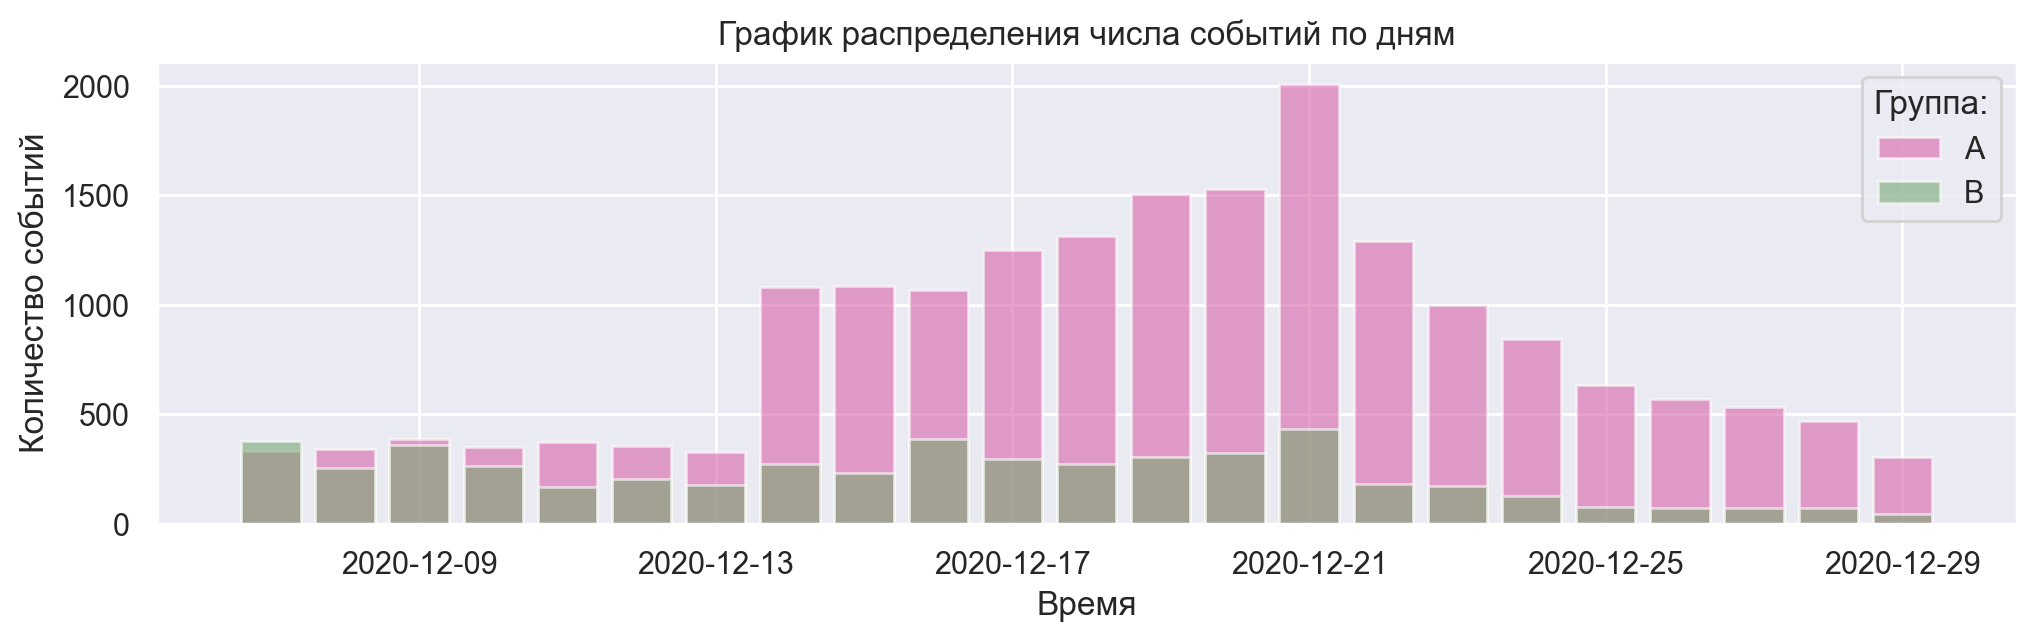

In [36]:
# для каждой группы в данных
plt.figure(figsize=[12, 3])
sns.set_theme()
for i in df['group'].unique().tolist():
    if i == 'A':
        color = '#D864A9'
    else: color = '#7AA874'
    # создадим сводную таблицу с количеством каждого типа события по дням
    data = df.loc[df['group']==i].pivot_table(index = 'event_date',
                            values = 'event_dt',aggfunc = 'count').reset_index()
    # визуализируем сводную таблицу
    plt.bar(data['event_date'], data['event_dt'], color = color, alpha=0.6, label=i)

plt.title('График распределения числа событий по дням')
plt.xlabel ('Время')
plt.ylabel('Количество событий')
plt.legend(title='Группа:')
plt.show()

В группе А до с 14 числа пользователи стали совершать большее количество событий, пик активности приходится на 21 декабря, далее количество событий начинает затухать и к 29 декабря доходят до значений начала эксперимента.

В группе В количество событий меньше, однако пик так же достигается 21 декабря и дальше график идет на спад.

К 21 декабря, пользователи, зарегестрировавгиеся 7 декабря "прожили" полные две недели и при следующих подсчетах их действия уже не учитывались, на следующий день не учитывались события зарегистрировавшихся 8 декабря, так что не удивительно, что график идет на спад.

### Конверсия воронки в выборках на разных этапах

Воронка должна иметь следующий вид: login, product_page, product_cart, purchase

In [37]:
# создадим функию, которая будет определять номер шага воронки:
def funnel_step (df):
    step = df['event_name']
    if step == 'login':                    
        return '0'
    elif step == 'product_page':
        return '2'
    elif step == 'product_cart': 
        return '3'
    else:
        return '4'
df['funnel_step'] = df.apply(funnel_step, axis=1) # применим функцию к датафрейму, создав новый столбец

In [38]:
# создадим таблицу с количеством уникальных пользльзователей для каждого события по группам
funnel_a = (df[df['group']=='A'].groupby(['event_name','funnel_step'])
            .agg({'user_id':'nunique'})
            .sort_values(by='funnel_step')
         .reset_index())
funnel_a.columns = ['event_name', 'funnel_step','count_user']

funnel_a['per%'] = round(funnel_a['count_user']/(df[df['group']=='A']['user_id'].nunique())*100, 2)

# добавим колонку воронки отношением к первому шагу
funnel_a['funnel_all%'] = round(funnel_a['count_user']/(funnel_a['count_user'][0])*100, 2)

# создадим столбец конверсии пользователей в шаг
for i in funnel_a.index:
    if i == 0:
        funnel_a.loc[i, 'funnel%'] = round(funnel_a.loc[i,'count_user']
                                      /funnel_a.loc[i,'count_user']*100, 2)
    else:
        funnel_a.loc[i, 'funnel%'] = round(funnel_a.loc[i,'count_user']
                                           /funnel_a.loc[i-1,'count_user']*100, 2)

In [39]:
# создадим таблицу с количеством уникальных пользльзователей для каждого события по группам
funnel_b = (df[df['group']=='B'].groupby(['event_name','funnel_step'])
            .agg({'user_id':'nunique'})
            .sort_values(by='funnel_step')
         .reset_index())
funnel_b.columns = ['event_name', 'funnel_step','count_user']

funnel_b['per%'] = round(funnel_b['count_user']/(df[df['group']=='B']['user_id'].nunique())*100, 2)

# добавим колонку воронки отношением к первому шагу
funnel_b['funnel_all%'] = round(funnel_b['count_user']/(funnel_b['count_user'][0])*100, 2)

# создадим столбец конверсии пользователей в шаг
for i in funnel_b.index:
    if i == 0:
        funnel_b.loc[i, 'funnel%'] = round(funnel_b.loc[i,'count_user']
                                      /funnel_b.loc[i,'count_user']*100, 2)
    else:
        funnel_b.loc[i, 'funnel%'] = round(funnel_b.loc[i,'count_user']
                                           /funnel_b.loc[i-1,'count_user']*100, 2)

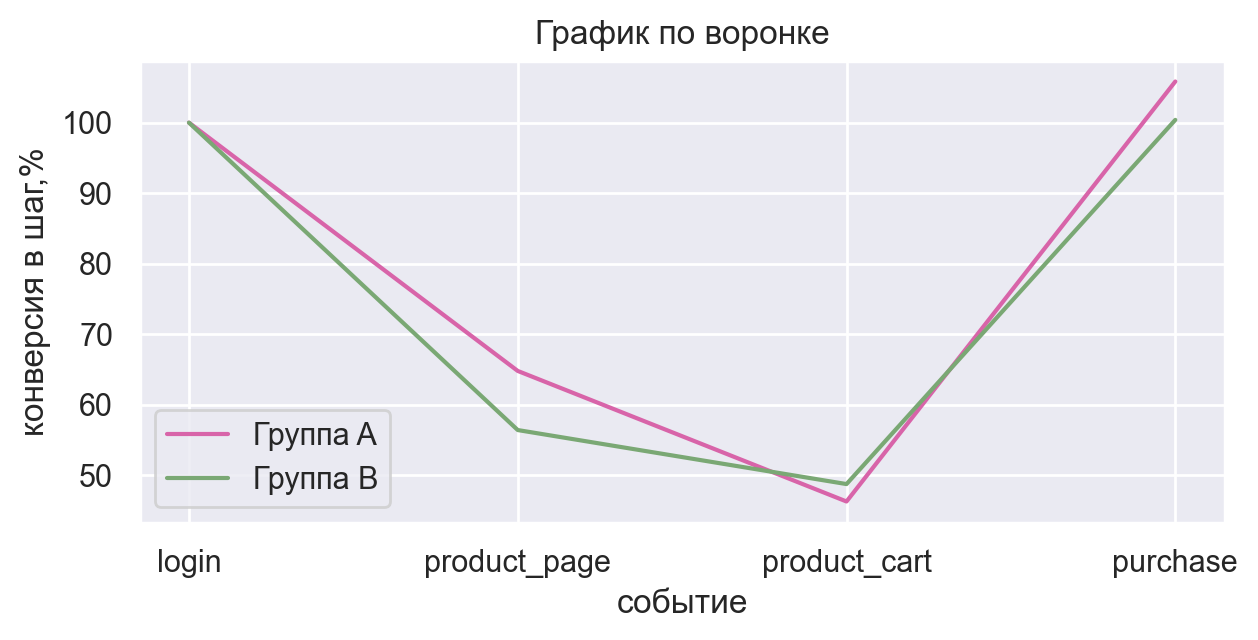

In [40]:
# построим график пользователей в шаг для группы A
plt.figure(figsize=[7, 3])
plt.plot(funnel_a['event_name'], funnel_a['funnel%'], color = '#D864A9',label='Группа A')

# построим график пользователей в шаг для группы B
plt.plot(funnel_b['event_name'], funnel_b['funnel%'], color = '#7AA874',label='Группа B')
plt.title('График по воронке')
plt.xlabel ('событие')
plt.ylabel('конверсия в шаг,%')
plt.legend()
plt.show()

In [41]:
print('Таблица конверсии пользователей для группы A')
display(funnel_a)
print('Таблица конверсии пользователей для группы B')
display(funnel_b)

Таблица конверсии пользователей для группы A


,event_name,funnel_step,count_user,per%,funnel_all%,funnel%
0,login,0,2747,100.00,100.00,100.00
1,product_page,2,1780,64.80,64.80,64.80
2,product_cart,3,824,30.00,30.00,46.29
3,purchase,4,872,31.74,31.74,105.83


Таблица конверсии пользователей для группы B


,event_name,funnel_step,count_user,per%,funnel_all%,funnel%
0,login,0,927,99.89,100.00,100.00
1,product_page,2,523,56.36,56.42,56.42
2,product_cart,3,255,27.48,27.51,48.76
3,purchase,4,256,27.59,27.62,100.39


Большое количество зарегистрировавших пользователей вообще не совершиют никаких действий. Из тех, кто прошел страницу login только 64% в группе А доходят до продуктовых страниц и 56% в группе В. На этом шаге теряется большая часть пользователей. Ввиду того, что пользователей совершивших покупку больше, чем пользоватлей посетивших продутовую корзину, можно сделать вывод, что страница продуктовой корзины не обязательна и ее можно пропустить.\
На данном этапе видно, что конверсия от изначального количества пользователей не увеличивается на 10%, а уменьшается.

**Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию?**

1. Безусловно стоит учитывать неполноту данных, т.к. неизвестно ничего о событиях пользователей за последние 6 дней эксперимента.
2. Так же стоит учитывать, что из общего числа тестируемых около 45% не совершали никаких действий.
3. Стоит учитывать, что во время проведения А/В-теста проводились маркетинговые акции в некоторых из регионов, которые так же могли повлиять на действия пользователей и, в итоге, на результаты теста.

## Результаты A/B-тестирования

In [42]:
# задаем функцию, которая 
def z_criteria(count, test, alpha): # передаем общее количество пользователей и тестовые группы
    for name, values in test.iteritems():
        # пропорция успехов в первой группе
        p1 = values[0]/count[0]
        
        # пропорция успехов во второй группе
        p2 = values[1]/count[1] 
        
        print(values[0], values[1],count[0] , count[1])
        
        # пропорция успехов в комбинированном датасете
        p_combined = (values[0] + values[1]) / (count[0] + count[1])
        
        # разница пропорций в датасетах
        difference = p1 - p2
        
        # считаем статистику в ст.отклонениях стандартного нормального распределения
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/count[0] + 1/count[1]))
        
        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1)
        
        # рассчитываем p_value
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        
        # выводим результат
        print('Для события {} '.format(name))
        print('p-значение: ', p_value)
        if p_value < alpha:
            print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
        else:
            print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
        print('')

Примем уровень значимости 0.05.

С каждой новой проверкой гипотезы растёт вероятность ошибки первого рода. 

Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез, применяют разные методы корректировки уровня значимости.

В данной рабботе будем применять ***Метод Шидака***:

*1 - (1 - 0.05)^(1/m)*

Количество сравнений - 3, поэтому параметр m формулы равняется 3

In [43]:
# расчитываем alpha по формуле метода Шидака
alpha = 1 - (1 - 0.05)**(1/3)
print('alpha =', round(alpha, 4))

alpha = 0.017


In [44]:
# рассчитаем таблицу с пользователями по событиям
test = (df.pivot_table(index = 'group',
                             columns = 'event_name',
                             values = 'user_id',
                             aggfunc = 'nunique').drop(columns=['login']))

In [45]:
# рассчитаем количество учасников в каждой группе
count = df.groupby('group').agg({'user_id':'nunique'})['user_id']


Сформулируем единые гопотезы для проверки равенства долей кортрольных групп для всех событий:
```
H_0: Доля группы A = Доля группы B`
H_1: Доля группы A ≠ Доля группы B`

alpha = 0.017
```

In [46]:
# для интересующих нас событий рассчитаем равенство долей
z_criteria(count,test,alpha)

824 255 2747 928
Для события product_cart 
p-значение:  0.14534814557238196
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

1780 523 2747 928
Для события product_page 
p-значение:  4.310980554755872e-06
Отвергаем нулевую гипотезу: между долями есть значимая разница

872 256 2747 928
Для события purchase 
p-значение:  0.017592402663314743
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Статистически значимая разница между долями групп присутствует только на втором шаге. Для остальных шагов воронки статистически значимой разницы выявлено не было. Таким образом, изменения, связанных с внедрением улучшенной рекомендательной системы не повлияют на конверсию пользователей в шаг.

## Выводы

**Результаты:**

1. В данных присутствовали пользовати двух различных тестов. 9,6 % пользователей участвовали сразу в двух экспериментах. По отдельности пользователи не попали в разные экспериментальные группы, однако если смотреть в целом, то таких пользователей 4,7%. 

2. Минимальная дата совпадает с датой запуска, однако дата остановки сильно завышена. Данные с 31 декабря 2020 по 4 января 2021 отсутсвуют.

3. По ТЗ новых пользователей перестали набирать 21 декабря, что соответствует действительности.
     
4. Процент пользователей из Европы попавших в тест равен 15%.

5. Для каждого пользователя были удалены события старше 14 дней с момента регистрации.

6. Были обнаружены пользователи, для который нет событий. Большая часть таких пользователей из новой платёжной воронки, которая итак обладает дефицитом пользователей по сравнению с контрольной группой. В данном исследовании пользователи без совершенных событий принимать участие не могут.

7. Изначально количество участников эксперимента составляло - 6701. Бо'льшее количество пользователей в контрольной группе, чем в новой платёжной воронке. После исключения из данных пользователей, для которых не определены события, всего участников эксперимента 3675.

8. Во время проведения эксперимента проводились две маркетинговые акции:
    - CIS New Year Gift Lottery - затрагивает только один день нашего исследования и страны СНГ,
    - Christmas&New Year Promo, проводившееся в Европе и Северной Америке затрагивает период с 25 по 30 декабря. Это довольно большой промежуток времени.
    
9. Среднее количество событий на пользователя отличается. При грубых рассчетах пользователи группы А совершают больше действий, чем пользователи группы B. При проверки гипотезы о том, что среднее количество действий пользователей между группами равны, пришлось отвергнуть гулевую гипотезу, между средними есть значимая разница. 

10. В группе А до с 14 числа пользователи стали совершать большее количество событий, пик активности приходится на 21 декабря, далее количество событий начинает затухать и к 29 декабря доходят до значений начала эксперимента. В группе В количество событий меньше, однако пик так же достигается 21 декабря и дальше график идет на спад. К 21 декабря, пользователи, зарегестрировавгиеся 7 декабря "прожили" полные две недели и при следующих подсчетах их действия уже не учитывались, на следующий день не учитывались события зарегистрировавшихся 8 декабря, так что не удивительно, что график идет на спад.

11. Большое количество зарегистрировавших пользователей вообще не совершиют никаких действий. Из тех, кто прошел страницу login только 64% в группе А доходят до продуктовых страниц и 56% в группе В. На этом шаге теряется большая часть пользователей. Ввиду того, что пользователей совершивших покупку больше, чем пользоватлей посетивших продутовую корзину, можно сделать вывод, что страница продуктовой корзины не обязательна и ее можно пропустить. Конверсия от изначального количества пользователей не увеличивается на 10%, а уменьшается.

12. Статистически значимая разница между долями групп присутствует только на втором шаге. Для остальных шагов воронки статистически значимой разницы выявлено не было. Таким образом, изменения, связанных с внедрением улучшенной рекомендательной системы не повлияют на конверсию пользователей в шаг.

**Вывод:** 

Данные в критичных моментах не соответствуют техническому заданию, что могло довольно существенно повлиять на результаты проводимого эксперимента. Не совпадает ни ожидаемое количество участников ни время проведения эксперимента. Негативно на результатах теста могла сказаться и проводимая в это время рождественская маркетинговая акция. Как по итогу в метрики контрольной группы оказались выше тех же у новой платежной воронки. Как итог тест нельзя назвать корректным.

A/B- тест будем считать состоявшимся, однако прироста конверсии на каждом шаге не произошло. Рекоммендовать внедрение улучшенной рекомендательной системы не стоит. Эксперимент следует завершить. Провести тест заново в другие даты вне времени проведения маркетинговых акций.